## [Allstate Claims Severity](https://goo.gl/1DwHVy) -- Predictions using machine learning:

### Author: Dr. Rahul Remanan, CEO and  Chief Imagination Officer [Moad Computer](https://www.moad.computer)

The [Allstate Corporation](https://en.wikipedia.org/wiki/Allstate) is the one of the largest insurance providers in the United States and one of the largest that is publicly held. The company also has personal lines insurance operations in Canada. Allstate was founded in 1931 as part of Sears, Roebuck and Co., and was spun off in 1993.[1](https://goo.gl/ce2JJ2) The company has had its headquarters in Northfield Township, Illinois, near Northbrook since 1967.[2](https://goo.gl/oX4kfZ),[3](https://goo.gl/mcTd3y)

As part of Allstate's ongoing efforts to develop automated methods of predicting the cost, and hence severity, of claims, they releasd a claims severity assessment dataset on Kaggle.[4](https://goo.gl/1DwHVy) In this challenge, datascientists were invited to show off their creativity and flex their technical chops by creating an algorithm which accurately predicts claims severity. The goal of this challenge was to help aspiring competitors demonstrate their insight into better ways of predicting claims severity.

We will be using this dataset to perform exploratory data analysis.

This R Jupyter notebook is a modified fork of a Kaggle kernel.[5](https://goo.gl/un416B)

## Part 01 -- Exploratory data analysis:

### Import dependent libraries:

In [1]:
knitr::opts_chunk$set(echo = TRUE)
library(data.table)
library(gridExtra)
library(corrplot)
library(GGally)
library(ggplot2)
library(e1071)

corrplot 0.84 loaded
Loading required package: ggplot2


### Load training data:

In [2]:
# run unzip ../data/train/\*.zip
dt_train <- fread("../data/train.csv")

### Load testing data:

In [3]:
dt_test <- fread("../data/test.csv")

### Print label names of variables:

In [4]:
names(dt_train)

[1] "id"     "cat1"   "cat2"   "cat3"   "cat4"   "cat5"   "cat6"   "cat7"  
  [9] "cat8"   "cat9"   "cat10"  "cat11"  "cat12"  "cat13"  "cat14"  "cat15" 
 [17] "cat16"  "cat17"  "cat18"  "cat19"  "cat20"  "cat21"  "cat22"  "cat23" 
 [25] "cat24"  "cat25"  "cat26"  "cat27"  "cat28"  "cat29"  "cat30"  "cat31" 
 [33] "cat32"  "cat33"  "cat34"  "cat35"  "cat36"  "cat37"  "cat38"  "cat39" 
 [41] "cat40"  "cat41"  "cat42"  "cat43"  "cat44"  "cat45"  "cat46"  "cat47" 
 [49] "cat48"  "cat49"  "cat50"  "cat51"  "cat52"  "cat53"  "cat54"  "cat55" 
 [57] "cat56"  "cat57"  "cat58"  "cat59"  "cat60"  "cat61"  "cat62"  "cat63" 
 [65] "cat64"  "cat65"  "cat66"  "cat67"  "cat68"  "cat69"  "cat70"  "cat71" 
 [73] "cat72"  "cat73"  "cat74"  "cat75"  "cat76"  "cat77"  "cat78"  "cat79" 
 [81] "cat80"  "cat81"  "cat82"  "cat83"  "cat84"  "cat85"  "cat86"  "cat87" 
 [89] "cat88"  "cat89"  "cat90"  "cat91"  "cat92"  "cat93"  "cat94"  "cat95" 
 [97] "cat96"  "cat97"  "cat98"  "cat99"  "cat100" "cat101" "cat102" "cat103"
[105] "cat104" "cat105" "cat106" "cat107" "cat108" "cat109" "cat110" "cat111"
[113] "cat112" "cat113" "cat114" "cat115" "cat116" "cont1"  "cont2"  "cont3" 
[121] "cont4"  "cont5"  "cont6"  "cont7"  "cont8"  "cont9"  "cont10" "cont11"
[129] "cont12" "cont13" "cont14" "loss"

In [5]:
cat_var <- names(dt_train)[which(sapply(dt_train, is.character))]
num_var <- names(dt_train)[which(sapply(dt_train, is.numeric))]
num_var <- setdiff(num_var, c("id", "loss"))

dt_train_cat <- dt_train[,.SD, .SDcols = cat_var]
dt_train_num <- dt_train[,.SD,.SDcols = num_var]

### Create a set of plotting functions:

In [6]:
plotBox <- function(data_in, i, lab) {
  data <- data.frame(x=data_in[[i]], y=lab)
  p <- ggplot(data=data, aes(x=x, y=y)) +geom_boxplot()+ xlab(colnames(data_in)[i]) + theme_light() + 
   ylab("log(loss)") + theme(axis.text.x = element_text(angle = 90, hjust =1))
  return (p)
}

In [7]:
doPlots <- function(data_in, fun, ii, lab, ncol=3) {
  pp <- list()
  for (i in ii) {
    p <- fun(data_in=data_in, i=i, lab=lab)
    pp <- c(pp, list(p))
  }
  do.call("grid.arrange", c(pp, ncol=ncol))
}

In [8]:
plotScatter <- function(data_in, i, lab){
  data <- data.frame(x=data_in[[i]], y = lab)
  p <- ggplot(data= data, aes(x = x, y=y)) + geom_point(size=1, alpha=0.3)+ geom_smooth(method = lm) +
    xlab(paste0(colnames(data_in)[i], '\n', 'R-Squared: ', round(cor(data_in[[i]], lab, use = 'complete.obs'), 2)))+
    ylab("log(loss)") + theme_light()
  return(suppressWarnings(p))
} 

In [9]:
plotDen <- function(data_in, i, lab){
  data <- data.frame(x=data_in[[i]], y=lab)
  p <- ggplot(data= data) + geom_density(aes(x = x), size = 1,alpha = 1.0) +
    xlab(paste0((colnames(data_in)[i]), '\n', 'Skewness: ',round(skewness(data_in[[i]], na.rm = TRUE), 2))) +
    theme_light() 
  return(p)
}

### Plots summarizing categorical variables:

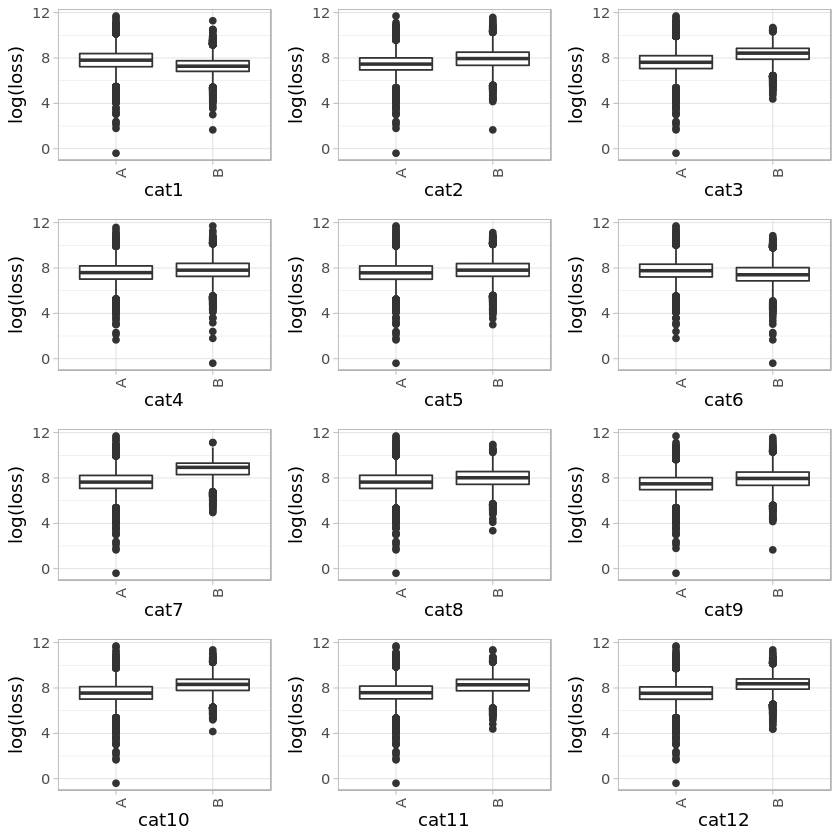

In [10]:
doPlots(dt_train_cat, fun = plotBox, ii =1:12, lab=log(dt_train$loss), ncol = 3)

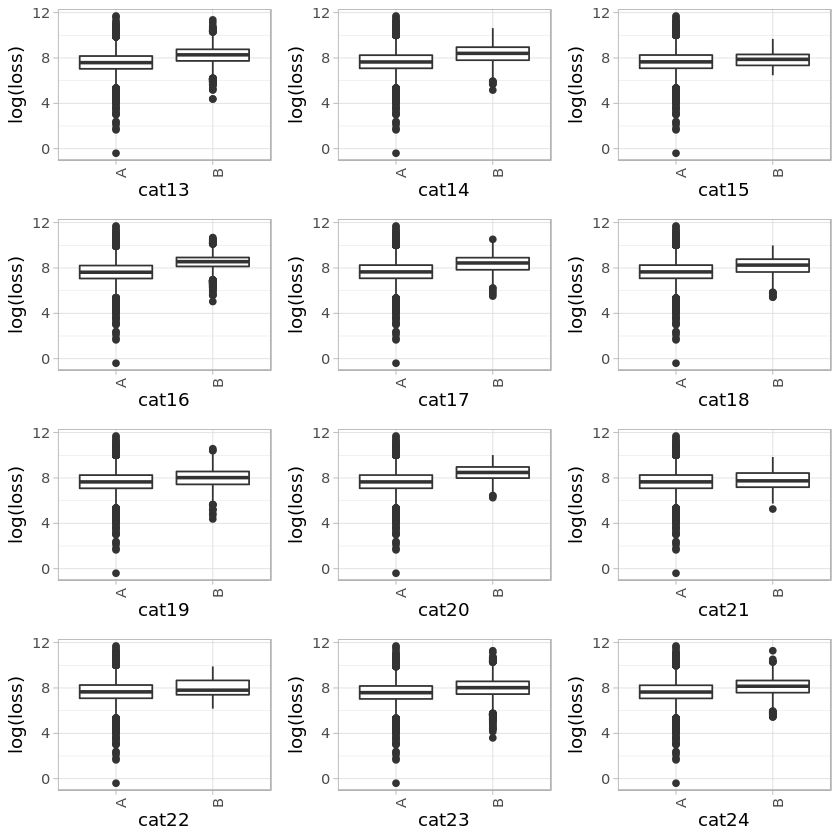

In [11]:
doPlots(dt_train_cat, fun = plotBox, ii =13:24, lab=log(dt_train$loss), ncol = 3)

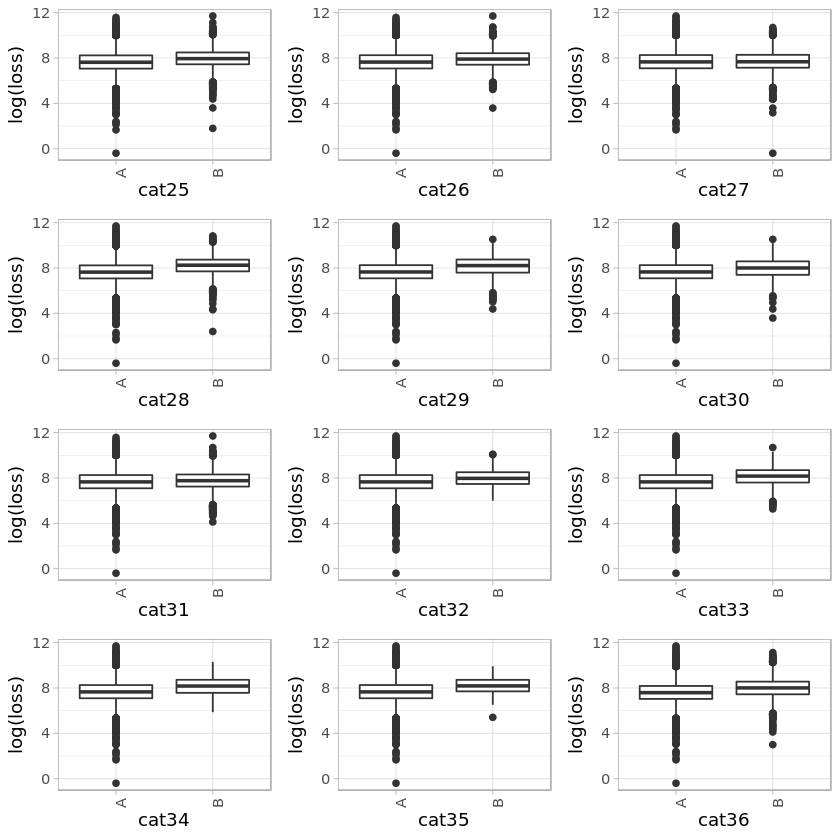

In [12]:
doPlots(dt_train_cat, fun = plotBox, ii =25:36, lab=log(dt_train$loss), ncol = 3)

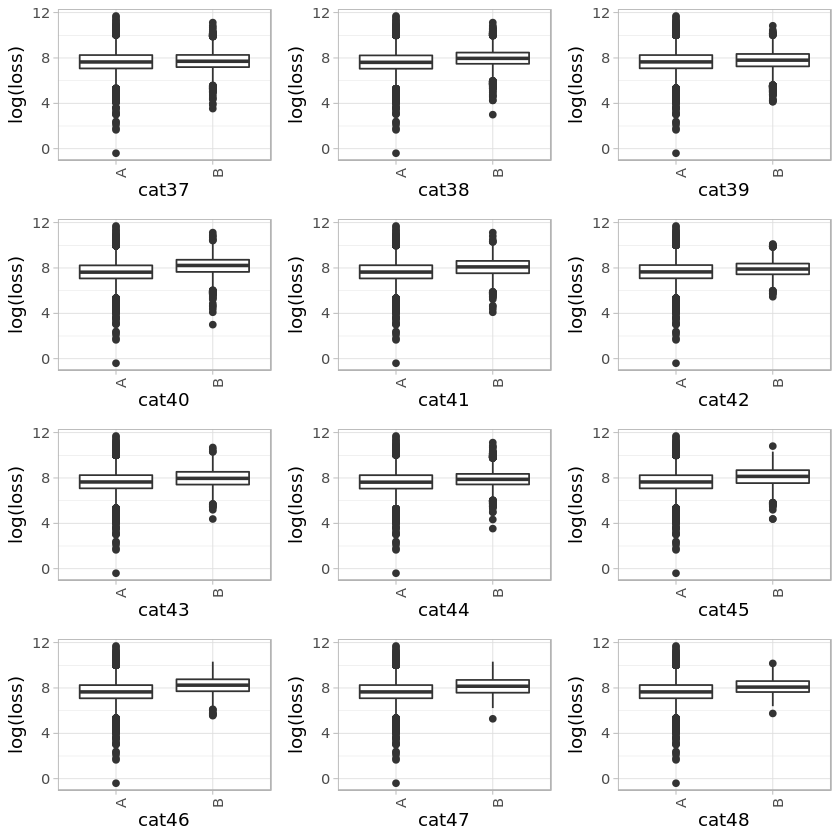

In [13]:
doPlots(dt_train_cat, fun = plotBox, ii =37:48, lab=log(dt_train$loss), ncol = 3)

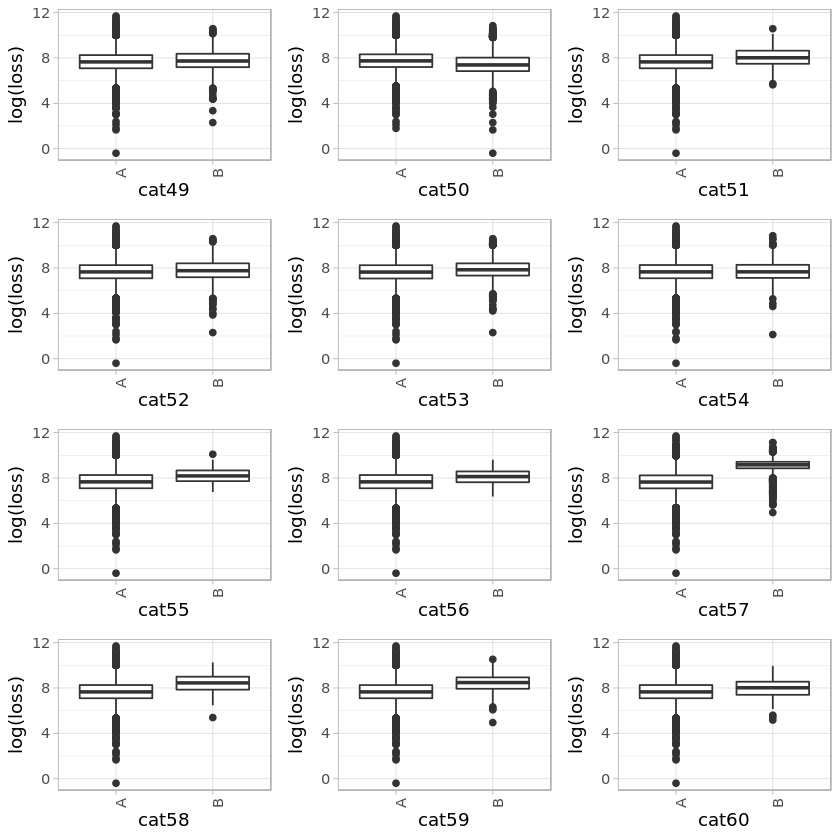

In [14]:
doPlots(dt_train_cat, fun = plotBox, ii =49:60, lab=log(dt_train$loss), ncol = 3)

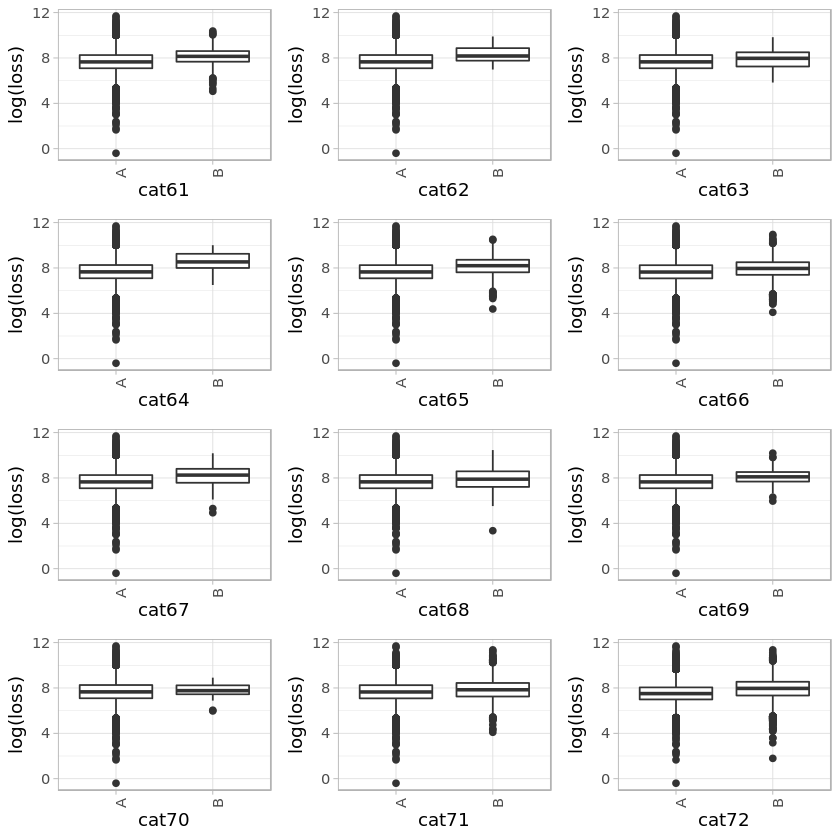

In [15]:
doPlots(dt_train_cat, fun = plotBox, ii =61:72, lab=log(dt_train$loss), ncol = 3)

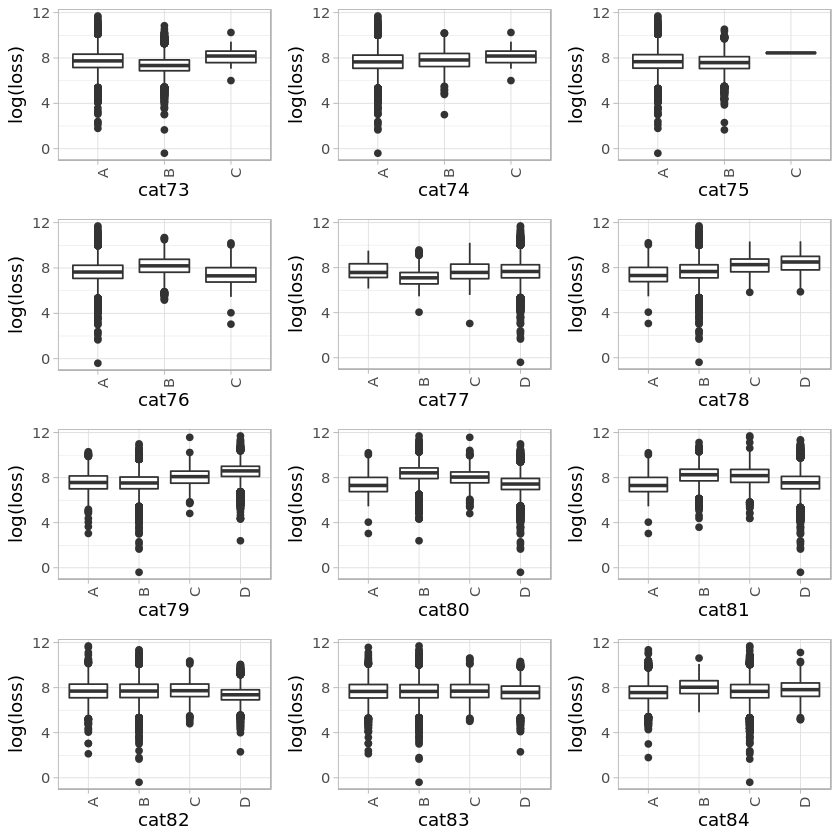

In [16]:
doPlots(dt_train_cat, fun = plotBox, ii =73:84, lab=log(dt_train$loss), ncol = 3)

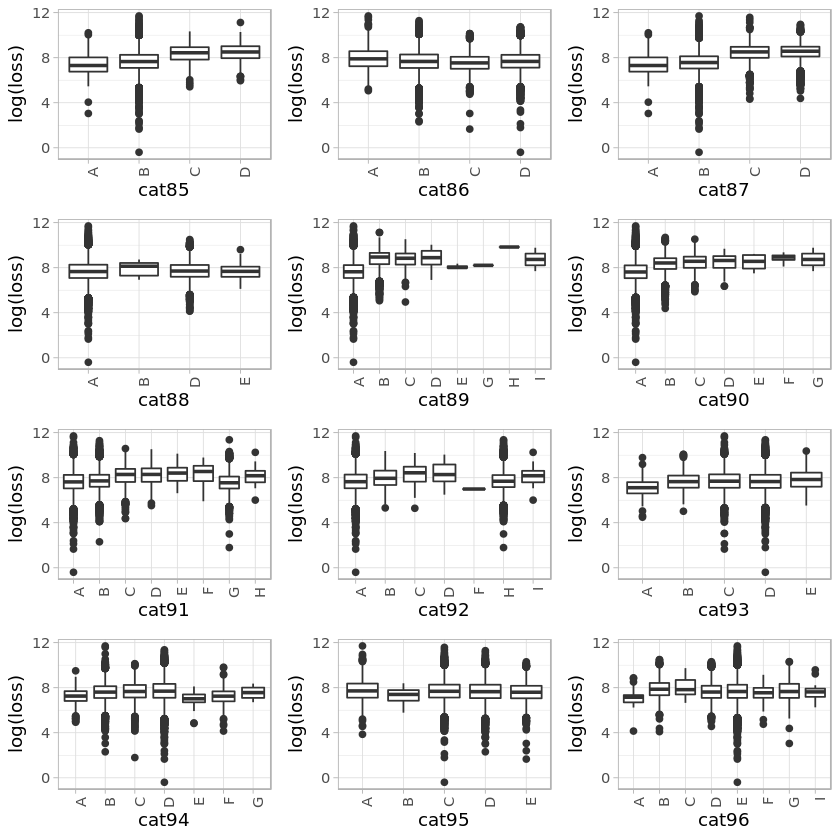

In [17]:
doPlots(dt_train_cat, fun = plotBox, ii =85:96, lab=log(dt_train$loss), ncol = 3)

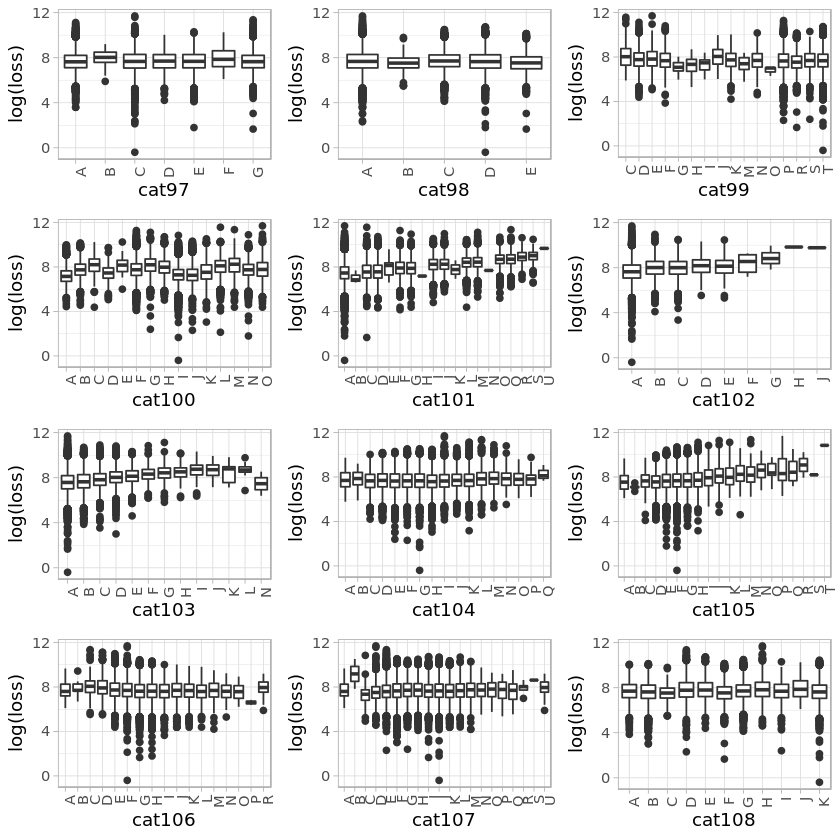

In [18]:
doPlots(dt_train_cat, fun = plotBox, ii =97:108, lab=log(dt_train$loss), ncol = 3)

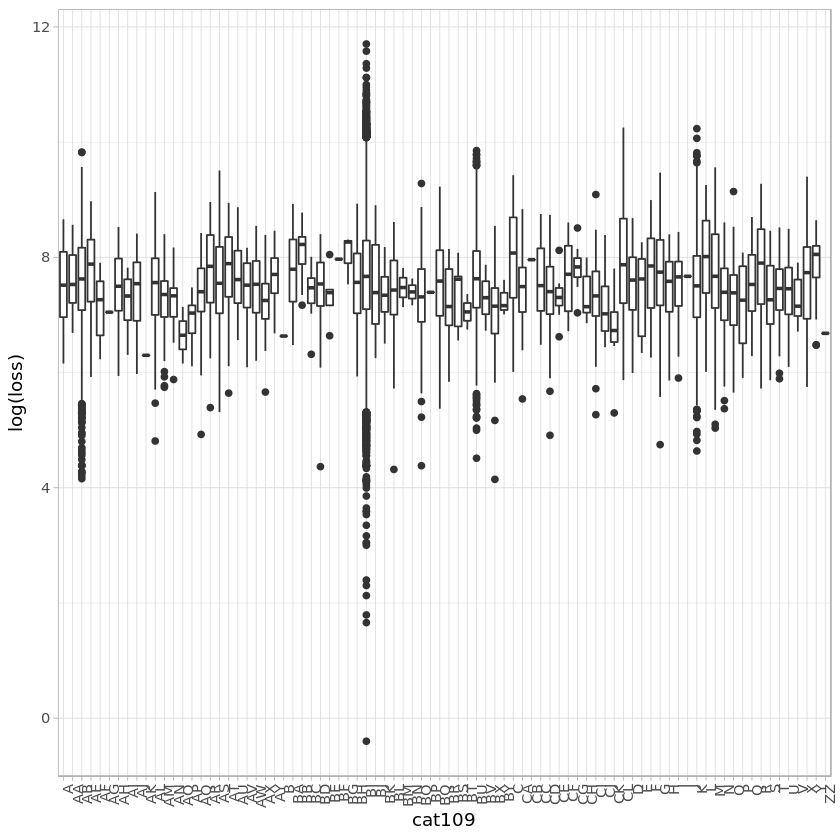

In [19]:
doPlots(dt_train_cat, fun = plotBox, ii =109, lab=log(dt_train$loss), ncol = 1)

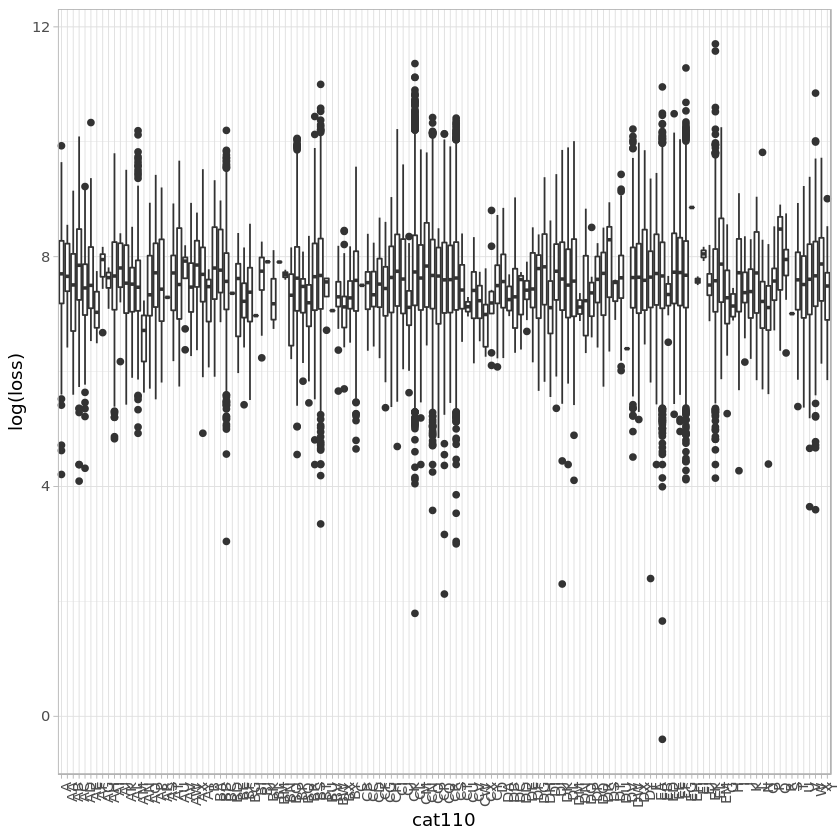

In [20]:
doPlots(dt_train_cat, fun = plotBox, ii =110, lab=log(dt_train$loss), ncol = 1)

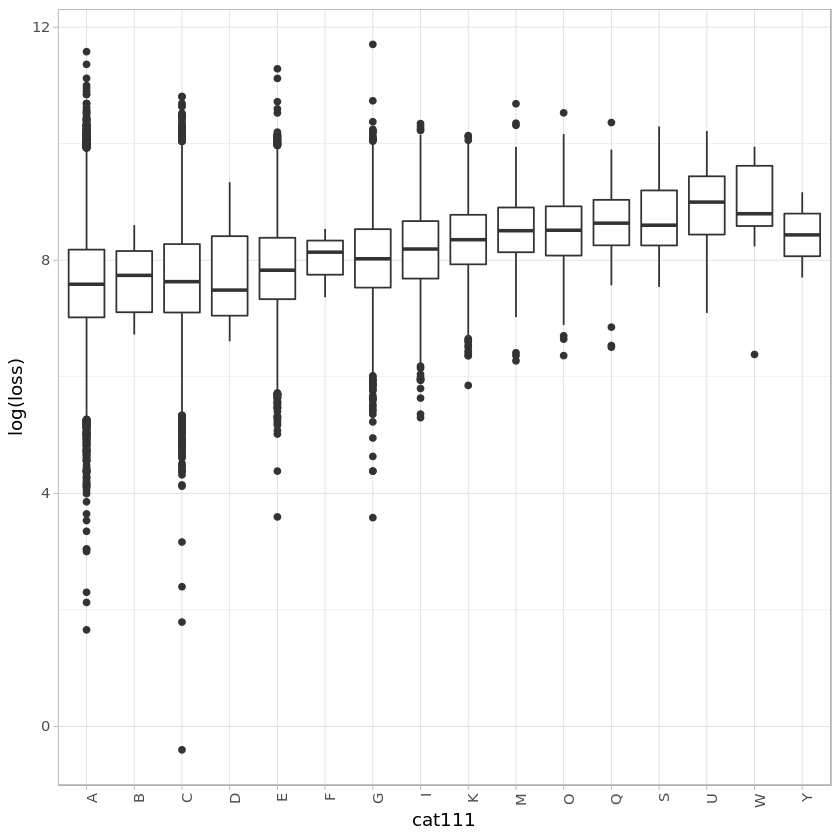

In [21]:
doPlots(dt_train_cat, fun = plotBox, ii =111, lab=log(dt_train$loss), ncol = 1)

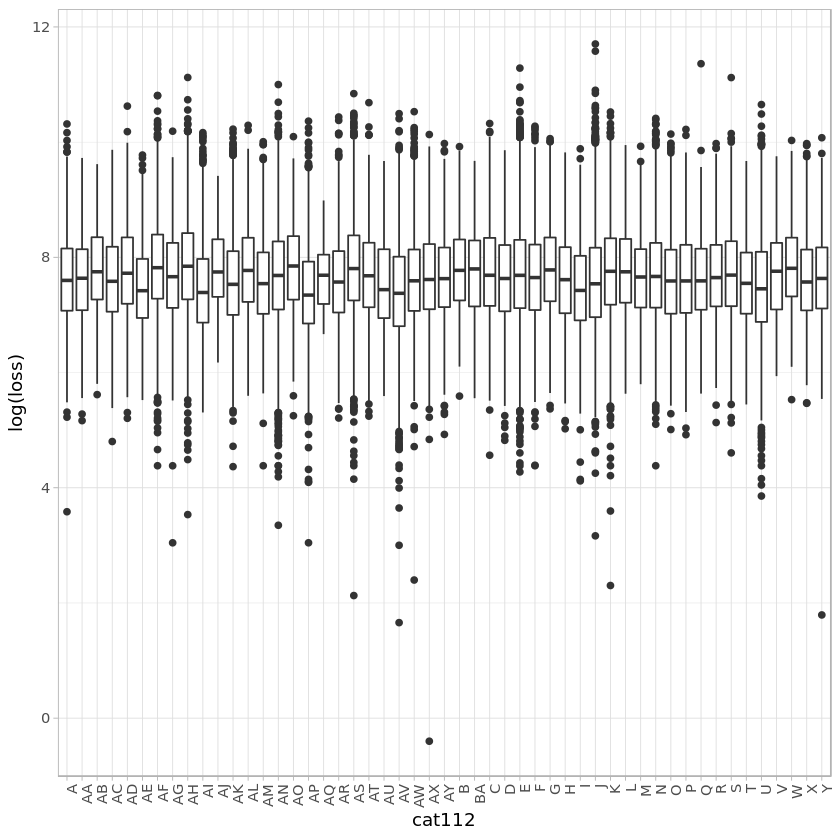

In [22]:
doPlots(dt_train_cat, fun = plotBox, ii =112, lab=log(dt_train$loss), ncol = 1)

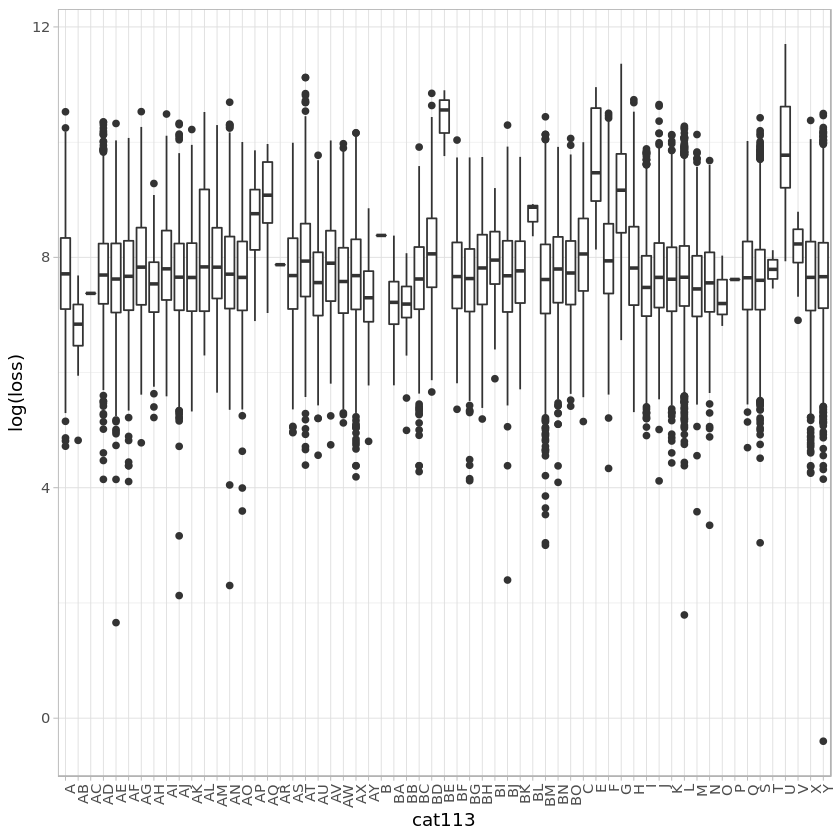

In [23]:
doPlots(dt_train_cat, fun = plotBox, ii =113, lab=log(dt_train$loss), ncol = 1)

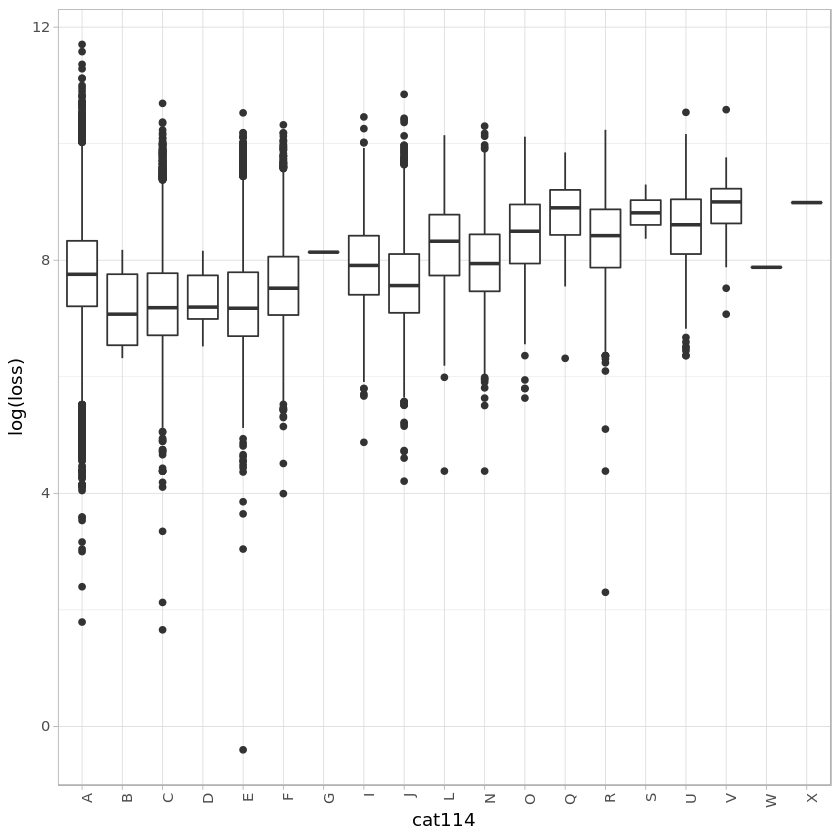

In [24]:
doPlots(dt_train_cat, fun = plotBox, ii =114, lab=log(dt_train$loss), ncol = 1)

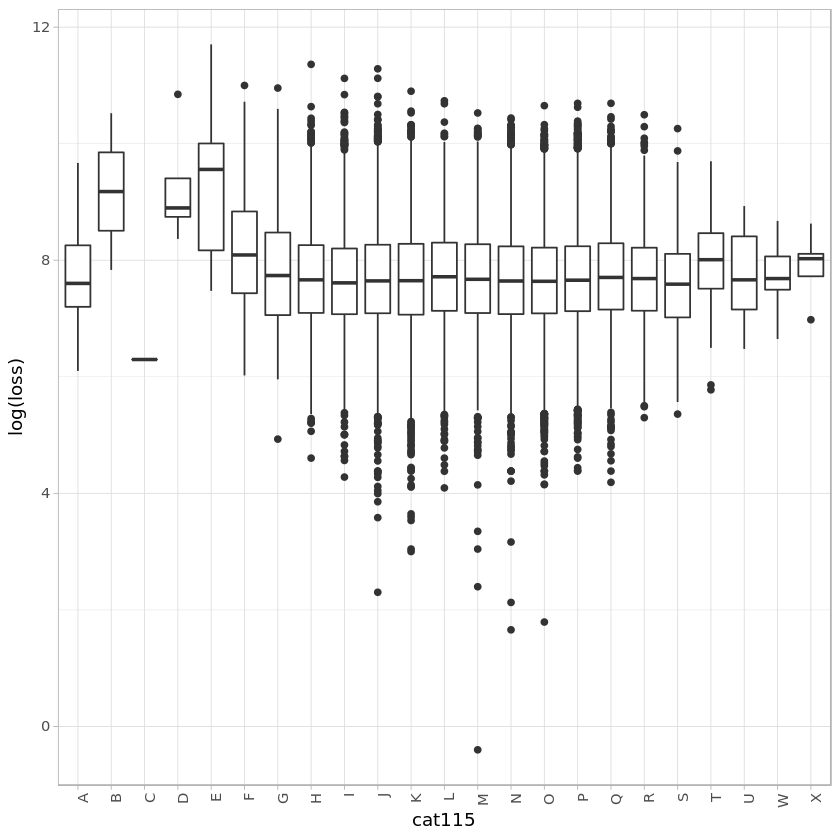

In [25]:
doPlots(dt_train_cat, fun = plotBox, ii =115, lab=log(dt_train$loss), ncol = 1)

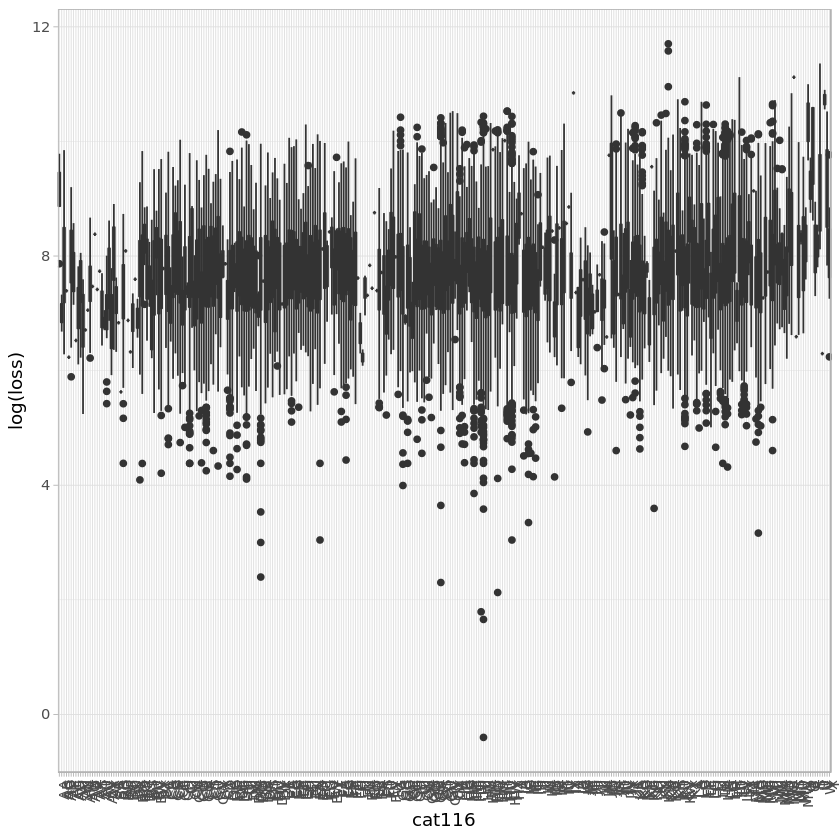

In [26]:
doPlots(dt_train_cat, fun = plotBox, ii =116, lab=log(dt_train$loss), ncol = 1)

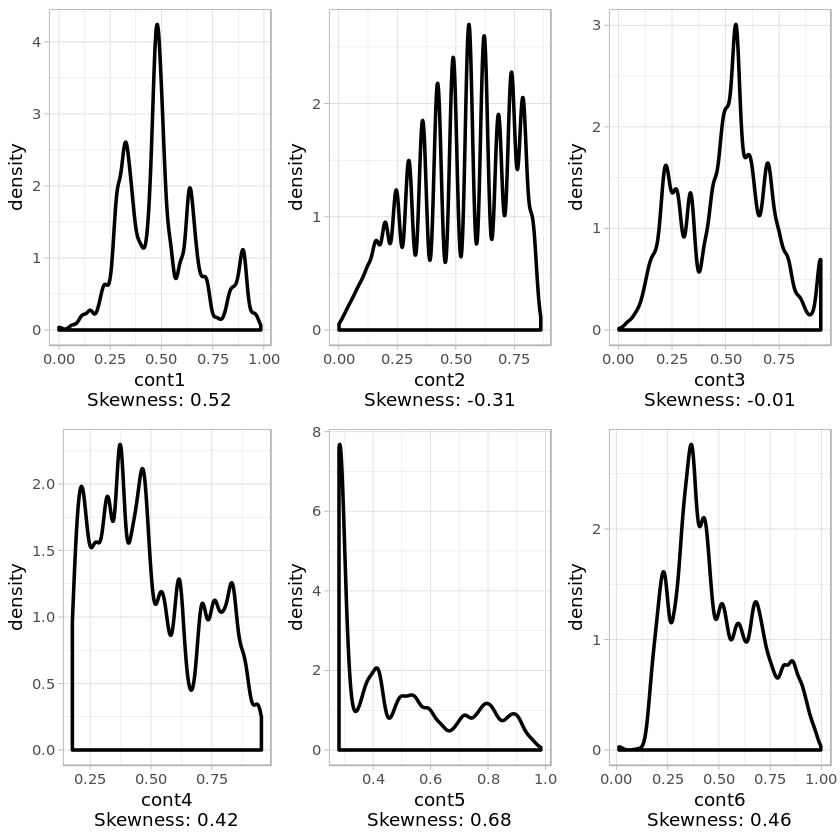

In [27]:
doPlots(dt_train_num, fun = plotDen, ii =1:6, lab=log(dt_train$loss), ncol = 3)

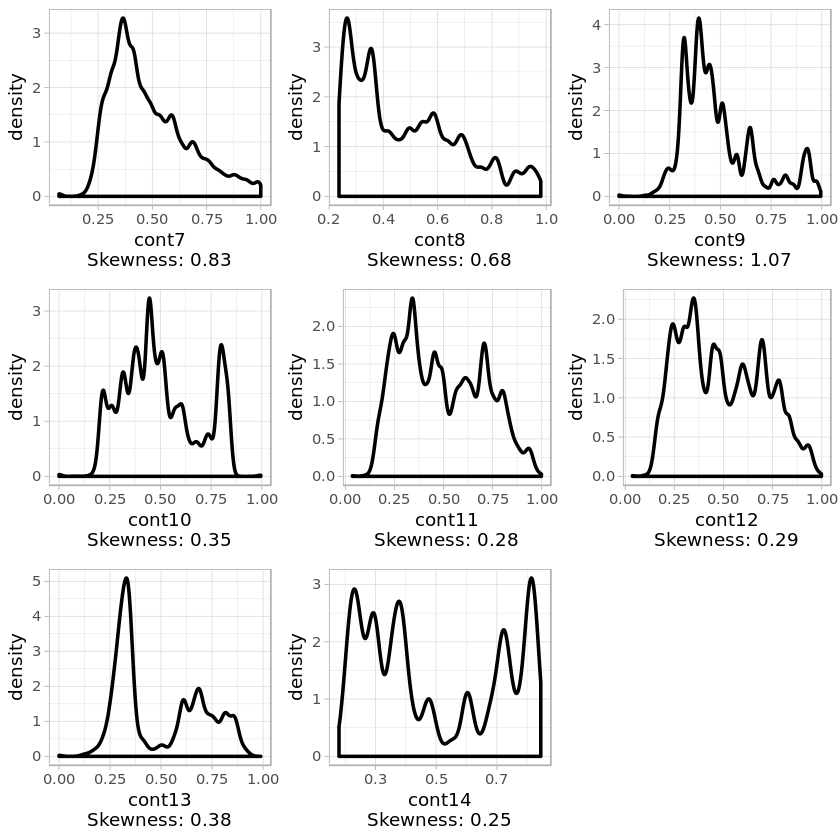

In [28]:
doPlots(dt_train_num, fun = plotDen, ii =7:14, lab=log(dt_train$loss), ncol = 3)

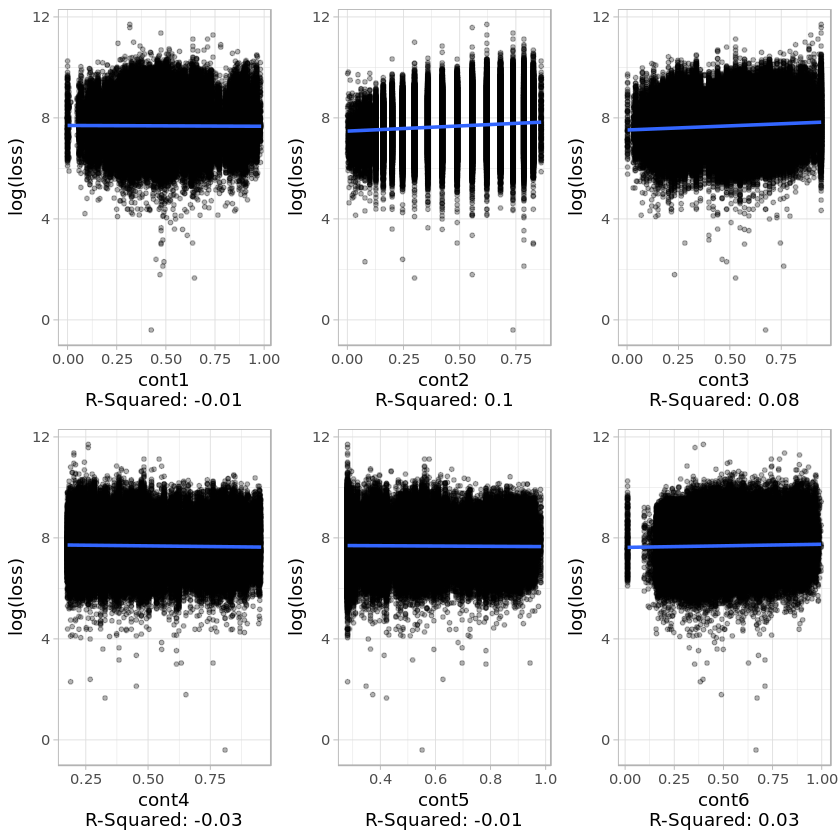

In [29]:
doPlots(dt_train_num, fun = plotScatter, ii =1:6, lab=log(dt_train$loss), ncol = 3)

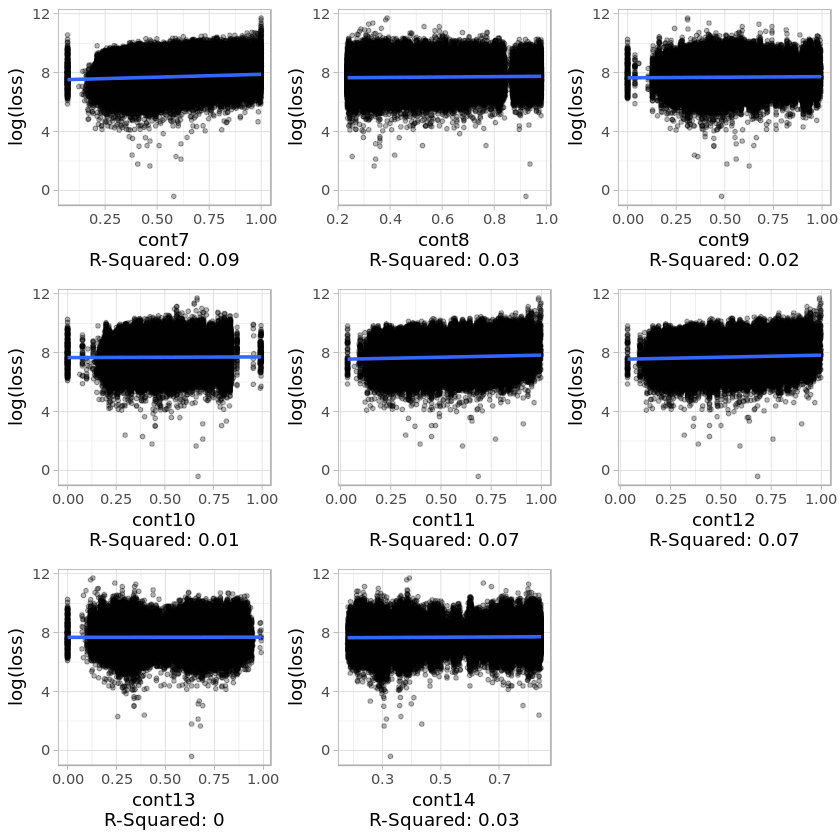

In [30]:
doPlots(dt_train_num, fun = plotScatter, ii =7:14, lab=log(dt_train$loss), ncol = 3)

### Generate correlations heatmap:

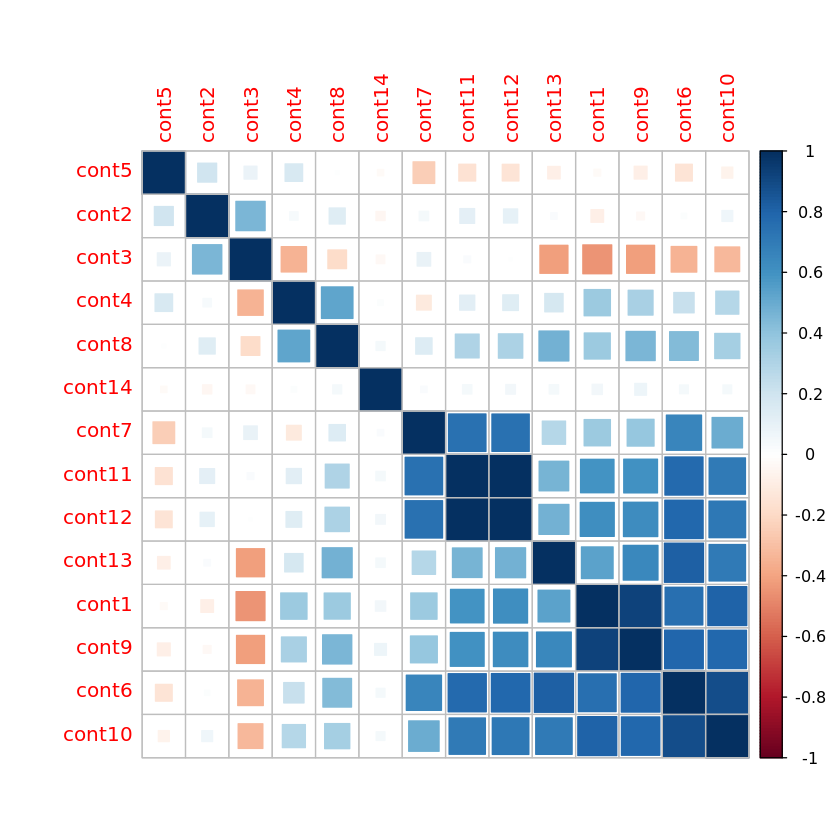

In [31]:
correlations <- cor(dt_train_num)
corrplot(correlations, method="square", order="hclust")

### Logloss histogram plot:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


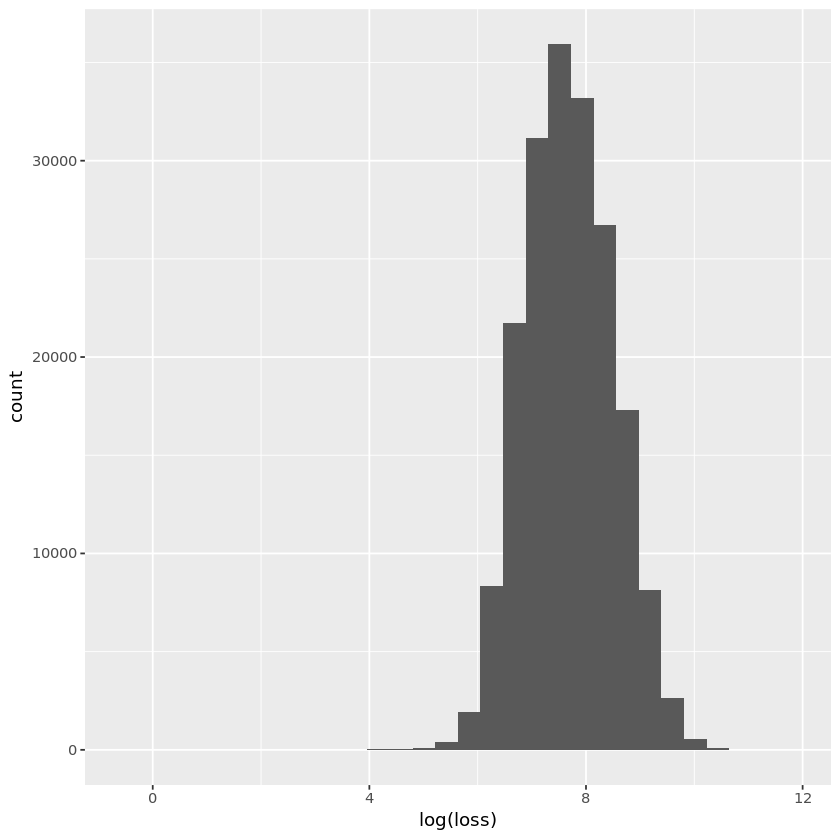

In [32]:
ggplot(dt_train) + geom_histogram(mapping=aes(x=log(loss)))

In [33]:
train <- dt_train[, loss:=log(loss)]; test <- dt_test[, loss:=NA]
train_ids <- train$id; test_ids <- test$id;
y_train <- train$loss

In [34]:
train_test = rbindlist(list(train, test), use.names = T)

In [35]:
plotCrossPlots <- function(df, x_string, y_string="loss") {
   p1 <- ggplot(df, aes_string(x = x_string, y = y_string)) + geom_point(alpha=0.5) + xlab(x_string) + ylab(y_string) +  theme_bw()
    p1
 }

### Generate CrossPlots:

### Visualizing cont1:

Warning message:
“Removed 125546 rows containing missing values (geom_point).”

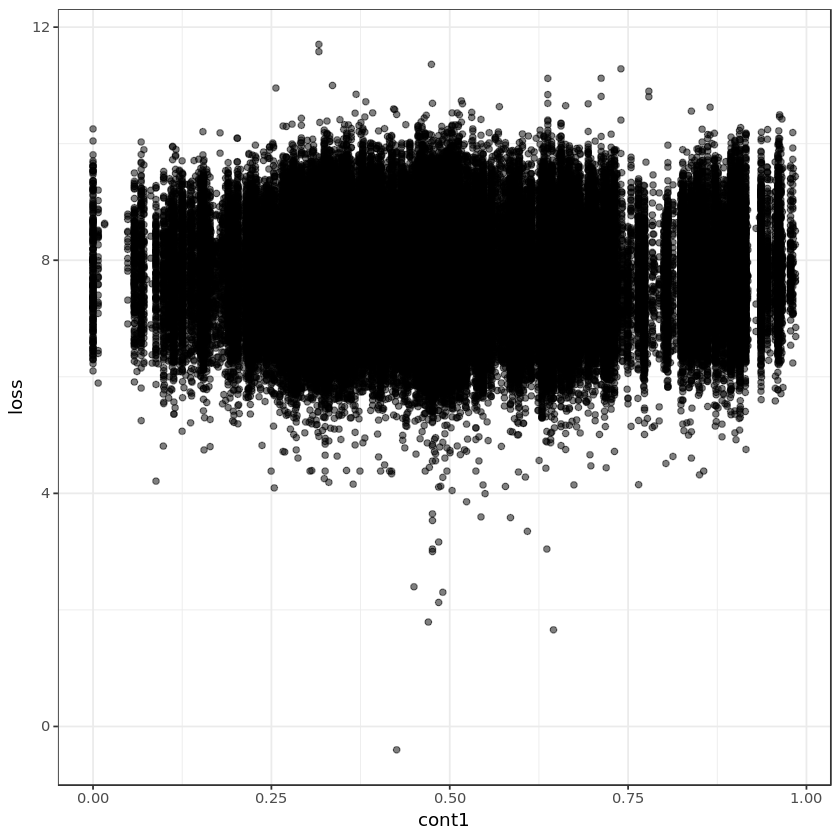

In [36]:
plotCrossPlots(train_test, "cont1")

### Visualizing cont2:

Warning message:
“Removed 125546 rows containing missing values (geom_point).”

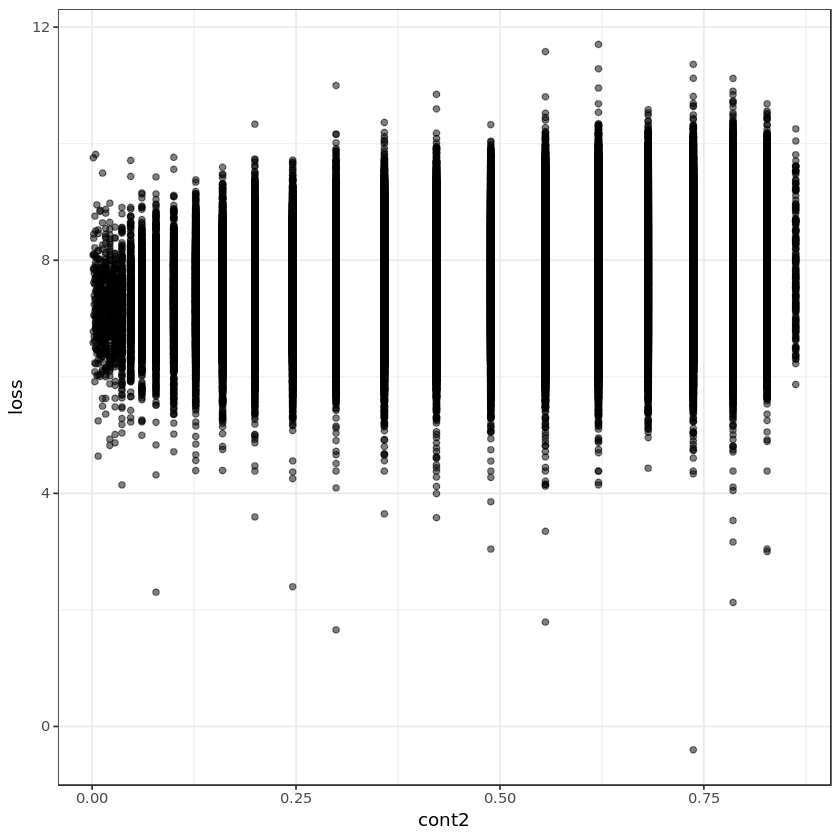

In [37]:
plotCrossPlots(train_test, "cont2")

In [38]:
length(unique(train_test$cont2))

[1] 33

In [39]:
round( max(train_test$cont2), 4)

[1] 0.8627

### Visualizing cont3:

Warning message:
“Removed 125546 rows containing missing values (geom_point).”

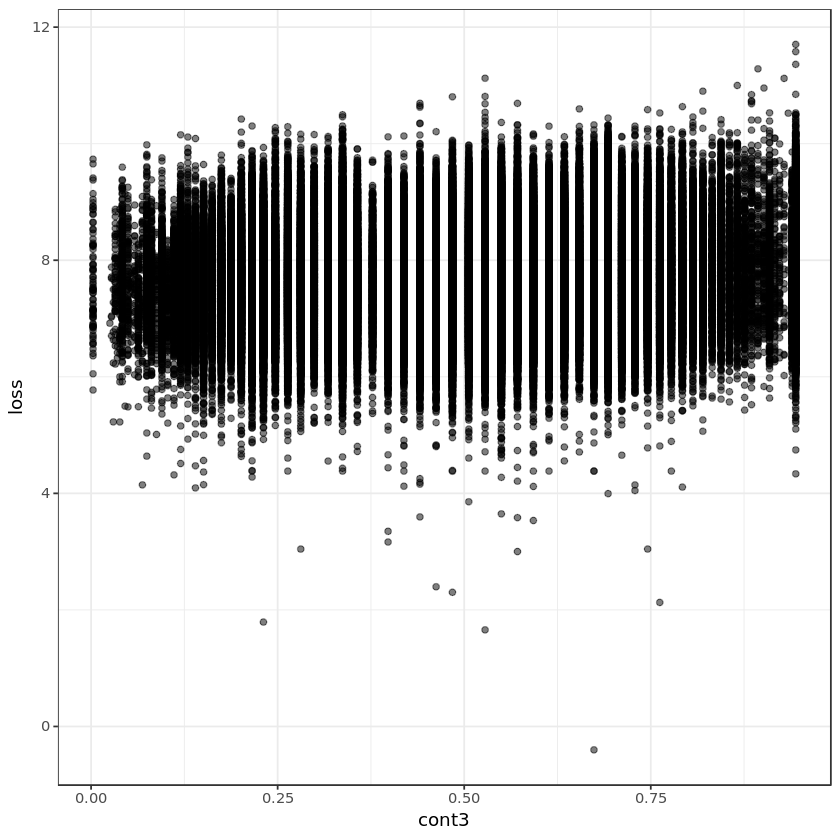

In [40]:
plotCrossPlots(train_test, "cont3")